In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

train_data = pd.read_csv('/projects/sc73/ranzcr-clip-catheter-line-classification/train.csv')
train_anno = pd.read_csv('/projects/sc73/ranzcr-clip-catheter-line-classification/train_annotations.csv')
# Merge data and annotated
study_annotated = pd.merge(train_data, train_anno, on='StudyInstanceUID', how='inner')

In [2]:
df = train_data.copy()
# Define a function to classify images as CVC or non-CVC
def classify_cvc(row):
    if row['CVC - Abnormal'] == 1 or row['CVC - Borderline'] == 1 or row['CVC - Normal'] == 1:
        return 'CVC'  # Label as 'CVC'
    else:
        return 'non-CVC'  # Label as 'non-CVC'

# Apply the function to create a new binary label column
df['CVC_binary'] = df.apply(classify_cvc, axis=1)

In [3]:
img_dir = "/projects/sc73/ranzcr-clip-catheter-line-classification/train/"

df['filename'] = img_dir + df['StudyInstanceUID'].astype(str) + ".jpg"

pd.set_option('display.max_colwidth', None)
df.head()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,CVC_binary,filename
0,1.2.826.0.1.3680043.8.498.26697628953273228189375557799582420561,0,0,0,0,0,0,1,0,0,0,0,ec89415d1,non-CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.26697628953273228189375557799582420561.jpg
1,1.2.826.0.1.3680043.8.498.46302891597398758759818628675365157729,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c,CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.46302891597398758759818628675365157729.jpg
2,1.2.826.0.1.3680043.8.498.23819260719748494858948050424870692577,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5,CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.23819260719748494858948050424870692577.jpg
3,1.2.826.0.1.3680043.8.498.68286643202323212801283518367144358744,0,0,0,0,0,0,0,1,0,0,0,c31019814,CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.68286643202323212801283518367144358744.jpg
4,1.2.826.0.1.3680043.8.498.10050203009225938259119000528814762175,0,0,0,0,0,0,0,0,0,1,0,207685cd1,CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.10050203009225938259119000528814762175.jpg


## Balancing and Reducing DF 

In [4]:
# Balancing the dataset
# Assuming 'df' is your DataFrame and 'column_name' is the column you want to count values in
cvc_counts = df['CVC_binary'].value_counts()

# Display the counts
print(cvc_counts)


CVC_binary
CVC        29333
non-CVC      750
Name: count, dtype: int64


In [5]:
non_cvc_rows = df[df['CVC_binary'] == 'non-CVC'].head(750)

# Filter rows with '1' in 'CVC - Borderline' and keep the first 2156
cvc_rows = df[df['CVC_binary'] == 'CVC'].head(750)

# Concatenate the filtered rows
balanced_df = pd.concat([cvc_rows, non_cvc_rows], axis=0)

# Reset the index if needed
balanced_df.reset_index(drop=True, inplace=True)

# Shuffle the rows of the 'balanced_df'
balanced_df = balanced_df.sample(frac=1, random_state= 42).reset_index(drop=True)

# Now 'balanced_df' contains exactly 2156 rows for each category
balanced_df
df = balanced_df
df

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,CVC_binary,filename
0,1.2.826.0.1.3680043.8.498.75269816256944932004789976844599885553,0,0,0,1,0,0,0,0,0,0,0,abc582e26,non-CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.75269816256944932004789976844599885553.jpg
1,1.2.826.0.1.3680043.8.498.38148642455048759279879518383684848345,0,0,1,0,0,1,0,0,0,0,0,7d2c4c9e3,non-CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.38148642455048759279879518383684848345.jpg
2,1.2.826.0.1.3680043.8.498.48017724189090247962085401587701185044,0,0,0,0,0,0,0,0,0,1,0,258689f05,CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.48017724189090247962085401587701185044.jpg
3,1.2.826.0.1.3680043.8.498.34542927388632149155642368808384736319,0,0,0,0,0,0,0,1,0,0,0,cc44aee1e,CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.34542927388632149155642368808384736319.jpg
4,1.2.826.0.1.3680043.8.498.55857119822711173674992429073684580704,0,0,0,0,0,0,0,0,0,1,0,186d09f68,CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.55857119822711173674992429073684580704.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1.2.826.0.1.3680043.8.498.54172637108890238767771718388685051700,0,0,1,0,0,0,1,0,0,0,0,2049e7e57,non-CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.54172637108890238767771718388685051700.jpg
1496,1.2.826.0.1.3680043.8.498.86313273921942250702253080566871861835,0,0,0,0,0,0,1,0,0,0,0,34242119f,non-CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.86313273921942250702253080566871861835.jpg
1497,1.2.826.0.1.3680043.8.498.36043382051297897320810872196451945432,0,0,0,0,0,0,1,0,0,0,0,26da0d5ad,non-CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.36043382051297897320810872196451945432.jpg
1498,1.2.826.0.1.3680043.8.498.67230023492787680337232860426562851179,0,0,1,0,0,0,1,0,0,0,0,5d44f5f0d,non-CVC,/projects/sc73/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.67230023492787680337232860426562851179.jpg


In [6]:
# Balancing the dataset
# Assuming 'df' is your DataFrame and 'column_name' is the column you want to count values in
cvc_counts = df['CVC_binary'].value_counts()

# Display the counts
print(cvc_counts)


CVC_binary
non-CVC    750
CVC        750
Name: count, dtype: int64


In [7]:
df.shape

(1500, 15)

## Importing, processing and Augmenting images

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocessing and augmentation
img_size = (224, 224)
batch_size = 32
validation_split = 0.2  # 20% of the data will be used for validation

# Create a data generator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split  # Set validation split
)

# Training generator (80% of the data)
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='filename',         # Column with image file paths
    y_col='CVC_binary',       # Use the new binary label column
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',      # Binary classification
    subset='training',
    shuffle=True
)

# validation generator (20% of data)
val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='filename',         # Column with image file paths
    y_col='CVC_binary',       # Use the new binary label column
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation', # Use validation subset
    shuffle = True
)

2024-10-09 09:03:46.859714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 1200 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


## Modelling - ResNet50

In [9]:
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)  # Binary classification, change to softmax if multi-class
    model = Model(inputs=base_model.input, outputs=x)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# load and build resnet model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=img_size + (3,))
resnet_model = build_model(resnet_base)

2024-10-09 09:04:02.658604: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/11.0/extras/CUPTI/lib64:/usr/local/cuda/11.0/lib64:/usr/local/cuda/11.0/lib:/usr/local/cuda/11.0/lib64/stubs
2024-10-09 09:04:02.658656: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-10-09 09:04:02.658677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (m3i023): /proc/driver/nvidia/version does not exist
2024-10-09 09:04:02.659648: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA


In [11]:
# train resnet model
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
38/38 [==============================] - 167s 4s/step - loss: 1.0898 - accuracy: 0.5708 - val_loss: 1.1048 - val_accuracy: 0.5133
Epoch 2/10
38/38 [==============================] - 148s 4s/step - loss: 0.6213 - accuracy: 0.6650 - val_loss: 1.6385 - val_accuracy: 0.5133
Epoch 3/10
38/38 [==============================] - 150s 4s/step - loss: 0.6181 - accuracy: 0.6767 - val_loss: 1.8203 - val_accuracy: 0.4867
Epoch 4/10
38/38 [==============================] - 152s 4s/step - loss: 0.5697 - accuracy: 0.7200 - val_loss: 6.7157 - val_accuracy: 0.5133
Epoch 5/10
38/38 [==============================] - 144s 4s/step - loss: 0.5677 - accuracy: 0.7133 - val_loss: 6.8108 - val_accuracy: 0.5133
Epoch 6/10
38/38 [==============================] - 146s 4s/step - loss: 0.5428 - accuracy: 0.7275 - val_loss: 0.8448 - val_accuracy: 0.5133
Epoch 7/10
38/38 [==============================] - 144s 4s/step - loss: 0.5492 - accuracy: 0.7458 - val_loss: 0.7525 - val_accuracy: 0.5133
Epoch 8/10
38

## Evaluation and Visualisation of ResNet Model

In [13]:
# Evaluate the model on the validation set
val_loss, val_accuracy = resnet_model.evaluate(val_generator)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


10/10 [==============================] - 8s 784ms/step - loss: 1.8545 - accuracy: 0.5133
Validation Loss: 1.8544731140136719
Validation Accuracy: 0.5133333206176758


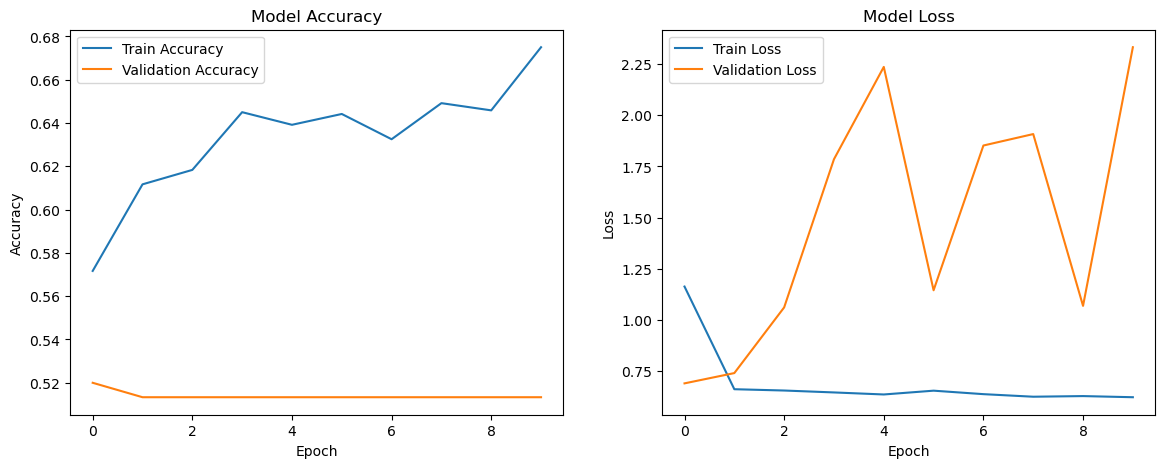

In [36]:
# Plotting training & validation accuracy values
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


10/10 [==============================] - 10s 842ms/step


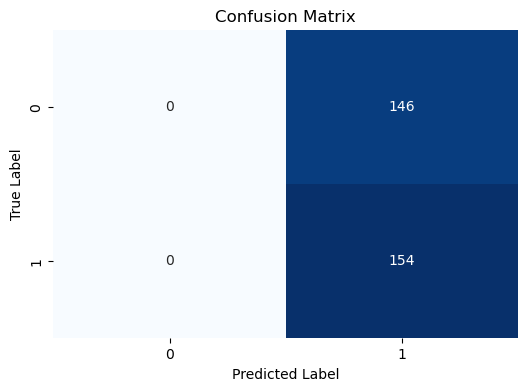

In [37]:
# Confusion Matrix of distribution of predicted and actual class labels

from sklearn.metrics import confusion_matrix

# Get true labels and predicted labels from validation set
y_true = val_generator.classes
y_pred = np.round(resnet_model.predict(val_generator))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


10/10 [==============================] - 9s 836ms/step


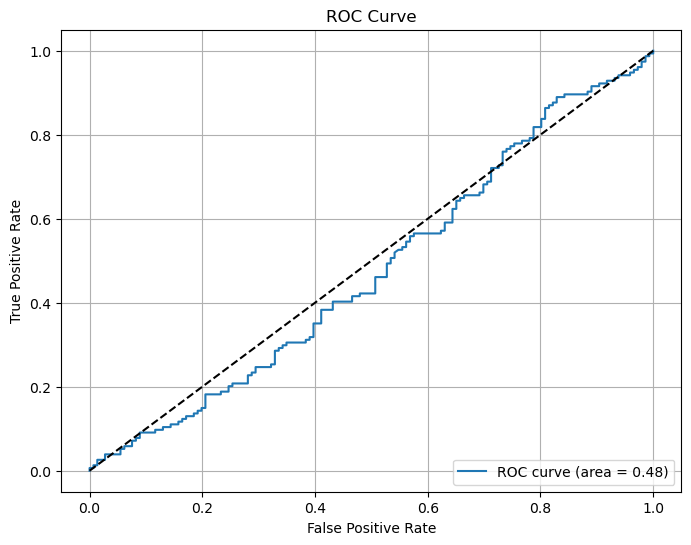

In [38]:
# ROC Curve (Receiver Operating Characteristic)

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for validation data
y_probs = resnet_model.predict(val_generator)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


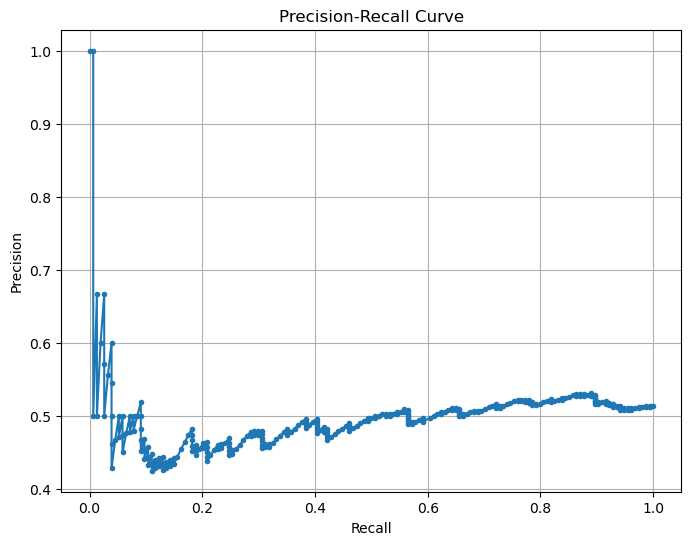

In [39]:
#Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


In [40]:
# Classification Report

from sklearn.metrics import classification_report

# Generate classification report
y_pred_labels = np.round(y_pred)  # Round predicted probabilities to 0 or 1
report = classification_report(y_true, y_pred_labels, target_names=['non-CVC', 'CVC'])

# Print the classification report
print(report)


              precision    recall  f1-score   support

     non-CVC       0.00      0.00      0.00       146
         CVC       0.51      1.00      0.68       154

    accuracy                           0.51       300
   macro avg       0.26      0.50      0.34       300
weighted avg       0.26      0.51      0.35       300



/apps/miniforge3/24.3.0-0/miniforge3/envs/dsks_2024.06/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/miniforge3/24.3.0-0/miniforge3/envs/dsks_2024.06/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/miniforge3/24.3.0-0/miniforge3/envs/dsks_2024.06/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

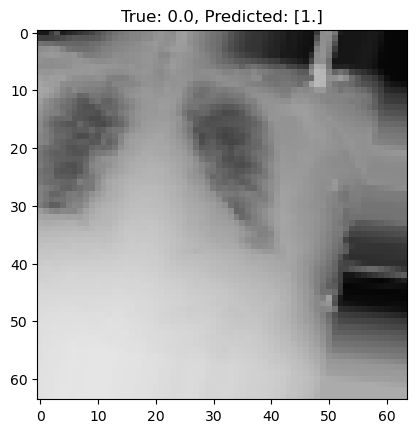

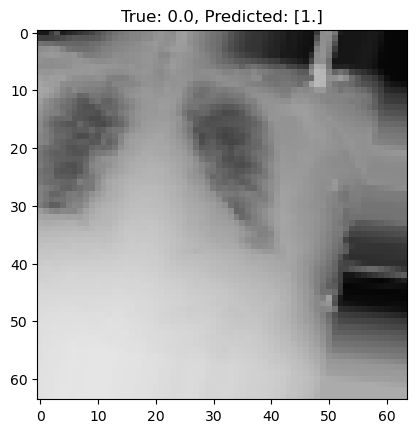

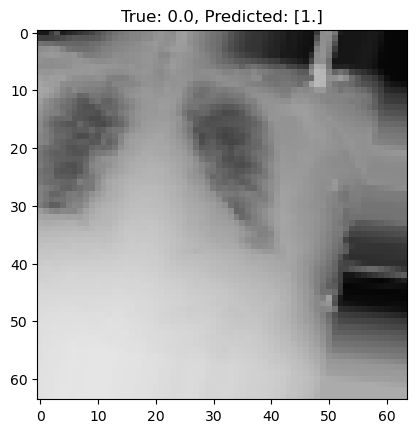

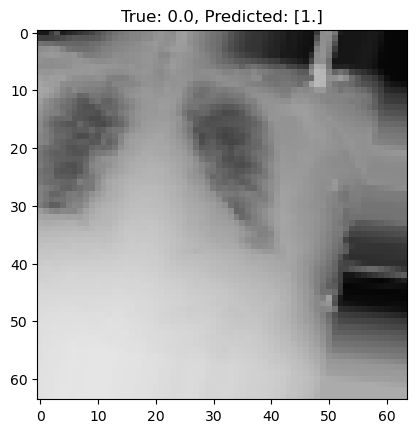

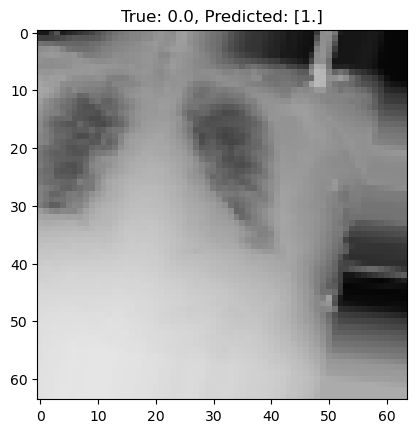

In [41]:
# Misclasified Images

import matplotlib.pyplot as plt

# Get predicted labels
predicted_labels = np.round(y_probs)

# Get images from validation set
validation_images, validation_labels = next(iter(val_generator))

# Find misclassified images
misclassified_idx = np.where(predicted_labels != validation_labels)[0]

# Visualize misclassified images
for i in misclassified_idx[:5]:  # Show first 5 misclassified images
    plt.imshow(validation_images[i])
    plt.title(f'True: {validation_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.show()


## Moddelling - Efficientnet

In [21]:
def create_efficientnetb0(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    return build_model(base_model)

In [22]:
efficientnetb0_model = create_efficientnetb0()

In [23]:
# Train the model
history_efficient = efficientnetb0_model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=val_generator
)

Epoch 1/10
38/38 [==============================] - 86s 2s/step - loss: 0.8594 - accuracy: 0.5492 - val_loss: 0.7764 - val_accuracy: 0.5133
Epoch 2/10
38/38 [==============================] - 62s 2s/step - loss: 0.7579 - accuracy: 0.5650 - val_loss: 0.7053 - val_accuracy: 0.5133
Epoch 3/10
38/38 [==============================] - 47s 1s/step - loss: 0.7045 - accuracy: 0.5750 - val_loss: 0.7947 - val_accuracy: 0.5133
Epoch 4/10
38/38 [==============================] - 63s 2s/step - loss: 0.6733 - accuracy: 0.6067 - val_loss: 0.7064 - val_accuracy: 0.4867
Epoch 5/10
38/38 [==============================] - 59s 2s/step - loss: 0.6571 - accuracy: 0.6067 - val_loss: 0.7040 - val_accuracy: 0.5133
Epoch 6/10
38/38 [==============================] - 56s 1s/step - loss: 0.6500 - accuracy: 0.6225 - val_loss: 0.7025 - val_accuracy: 0.4867
Epoch 7/10
38/38 [==============================] - 63s 2s/step - loss: 0.6552 - accuracy: 0.5942 - val_loss: 0.6952 - val_accuracy: 0.4867
Epoch 8/10
38/38 [==

## Evaluation and Visualisation of EfficientNet Model

In [24]:
# Evaluate the model on the validation set
val_loss, val_accuracy = efficientnetb0_model.evaluate(val_generator)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

10/10 [==============================] - 6s 626ms/step - loss: 0.7482 - accuracy: 0.5133
Validation Loss: 0.7482016086578369
Validation Accuracy: 0.5133333206176758


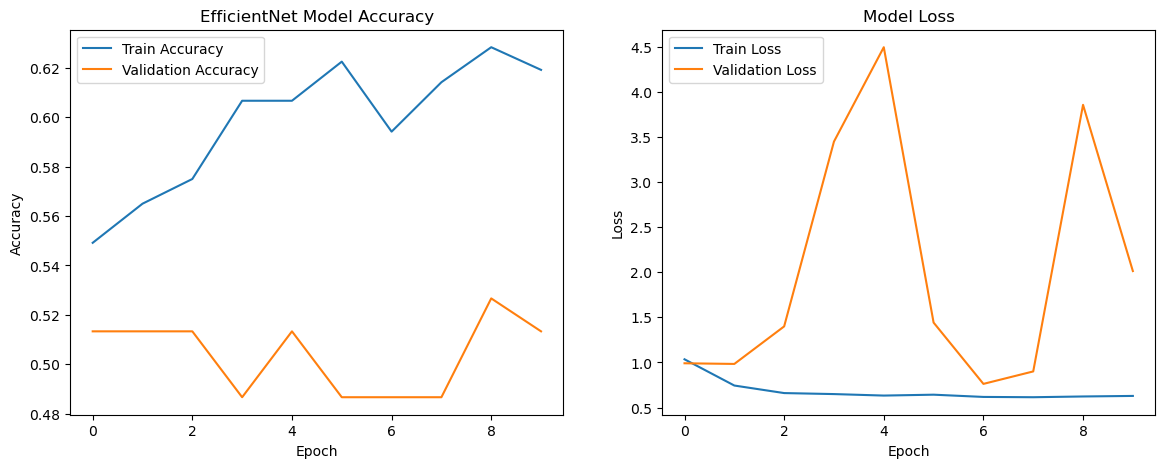

In [25]:
# Plotting training & validation accuracy values
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_efficient.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficient.history['val_accuracy'], label='Validation Accuracy')
plt.title('EfficientNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


10/10 [==============================] - 9s 798ms/step


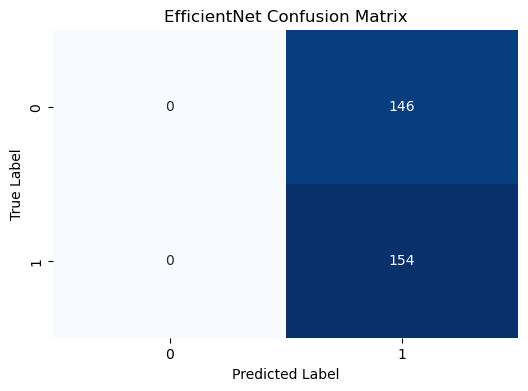

In [26]:
# Get true labels and predicted labels from validation set
y_true_efficient = val_generator.classes
y_pred_efficient = np.round(efficientnetb0_model.predict(val_generator))

# Compute the confusion matrix
cm = confusion_matrix(y_true_efficient, y_pred_efficient)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('EfficientNet Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


10/10 [==============================] - 9s 955ms/step


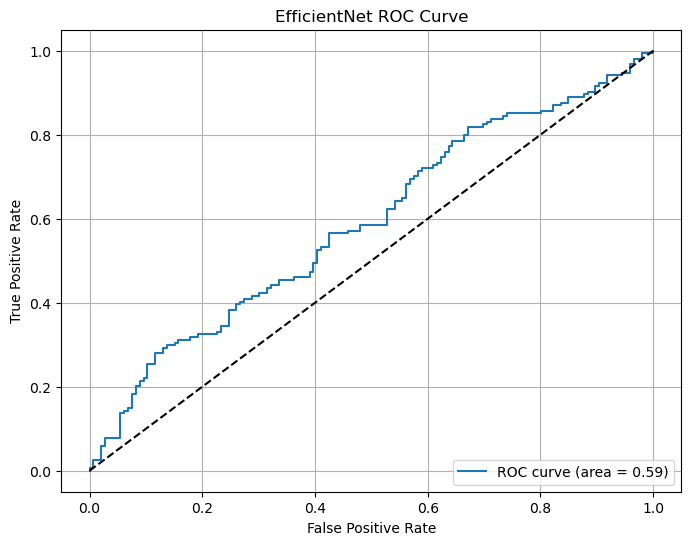

In [27]:
# Get predicted probabilities for validation data
y_probs_efficient = efficientnetb0_model.predict(val_generator)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true_efficient, y_probs_efficient)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.title('EfficientNet ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


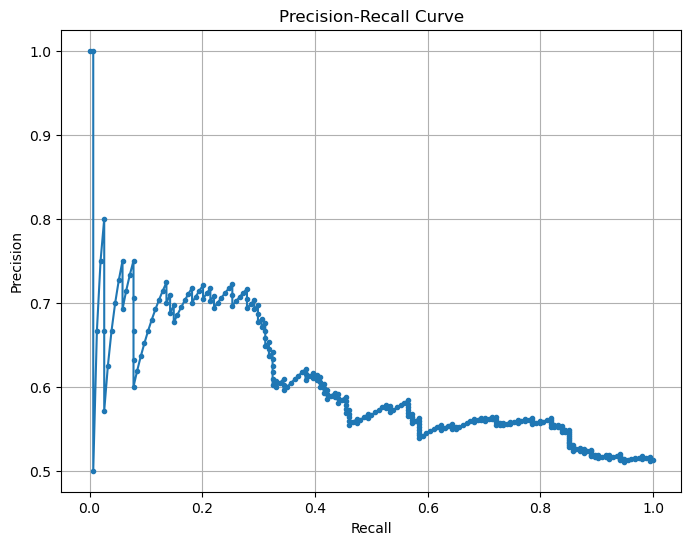

In [28]:
# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_true_efficient, y_probs_efficient)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


In [29]:
# Generate classification report
y_pred_labels_efficient = np.round(y_pred_efficient)  # Round predicted probabilities to 0 or 1
report = classification_report(y_true_efficient, y_pred_labels_efficient, target_names=['non-CVC', 'CVC'])

# Print the classification report
print(report)


              precision    recall  f1-score   support

     non-CVC       0.00      0.00      0.00       146
         CVC       0.51      1.00      0.68       154

    accuracy                           0.51       300
   macro avg       0.26      0.50      0.34       300
weighted avg       0.26      0.51      0.35       300



/apps/miniforge3/24.3.0-0/miniforge3/envs/dsks_2024.06/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/miniforge3/24.3.0-0/miniforge3/envs/dsks_2024.06/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/miniforge3/24.3.0-0/miniforge3/envs/dsks_2024.06/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

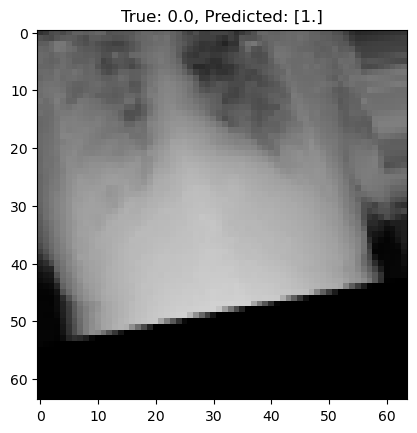

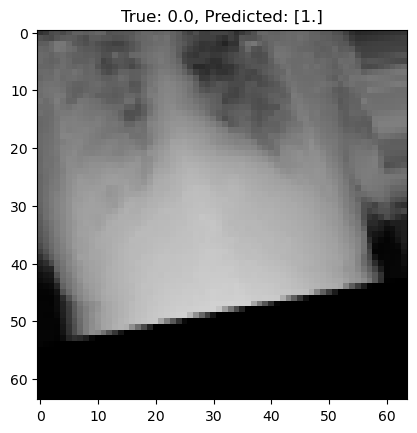

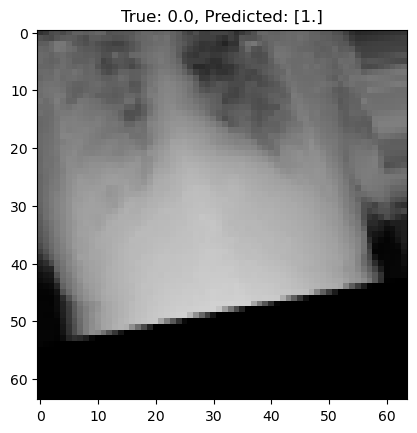

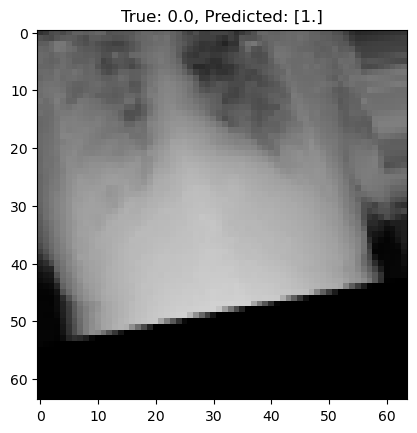

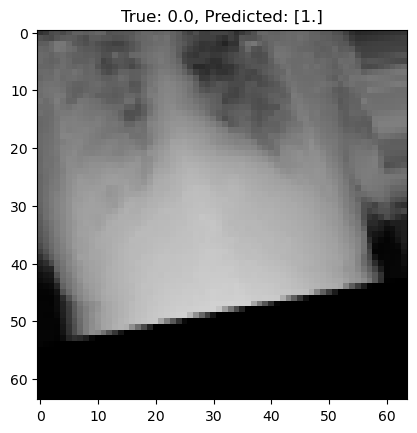

In [30]:
import matplotlib.pyplot as plt

# Get predicted labels
predicted_labels_efficient = np.round(y_probs_efficient)

# Get images from validation set
validation_images_efficient, validation_labels_efficient = next(iter(val_generator))

# Find misclassified images
misclassified_idx = np.where(predicted_labels_efficient != validation_labels_efficient)[0]

# Visualize misclassified images
for i in misclassified_idx[:5]:  # Show first 5 misclassified images
    plt.imshow(validation_images_efficient[i])
    plt.title(f'True: {validation_labels[i]}, Predicted: {predicted_labels_efficient[i]}')
    plt.show()
